In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
uve_age = pd.read_csv('all_uveitis_age_thin.csv')

In [3]:
new_age = [i[-1] for i in uve_age["age"].str.strip(' years').str.split('-')]
age_dict = dict(zip(uve_age.index, new_age))

In [4]:
uve_age.rename(index=age_dict, inplace=True)
uve_age.drop(['Total', '100+'], axis=0, inplace=True)
uve_age.index = uve_age.index.astype(int)

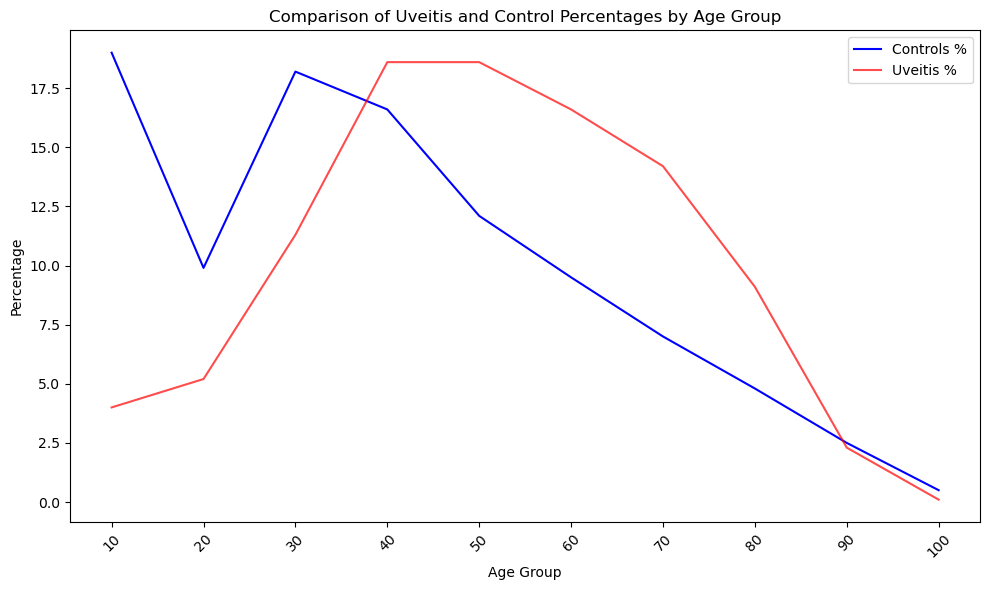

In [5]:

plt.figure(figsize=(10, 6))
plt.plot(uve_age.index, uve_age['controls_perc'], color='blue', label='Controls %')
plt.plot(uve_age.index, uve_age['uveitis_perc'], color='red', alpha=0.7, label='Uveitis %')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Comparison of Uveitis and Control Percentages by Age Group')
plt.xticks(ticks=uve_age.index,rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('age_distribution_THIN.svg')
plt.show()


In [6]:
uve_age['uve_incidence'] = uve_age['uveitis_n']/(uve_age['controls_n']/100000)

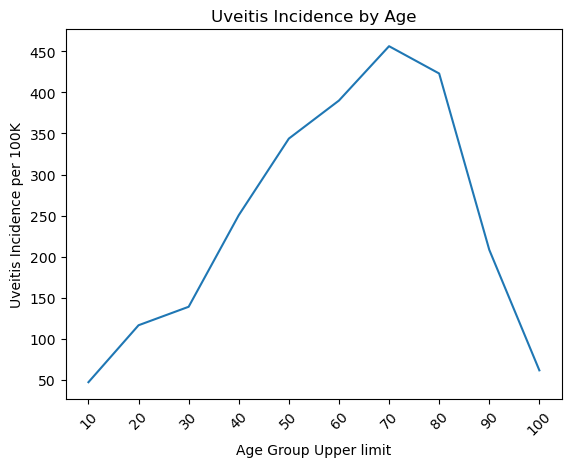

In [7]:
plt.plot(uve_age['uve_incidence'])
plt.xlabel('Age Group Upper limit')
plt.ylabel('Uveitis Incidence per 100K')
plt.title('Uveitis Incidence by Age')
plt.xticks(ticks=uve_age.index,rotation=45)
plt.show()



In [8]:
merging_uve_age = uve_age.copy()

In [9]:
merging_uve_age.loc[30]= merging_uve_age.loc[:30].sum(axis=0)
merging_uve_age.loc[90] = merging_uve_age.loc[90:].sum(axis=0)
merging_uve_age = merging_uve_age.drop([10,20,100])

In [10]:
merging_uve_age['uve_incidence'] =merging_uve_age['uveitis_n']/(merging_uve_age['controls_n']/100000)

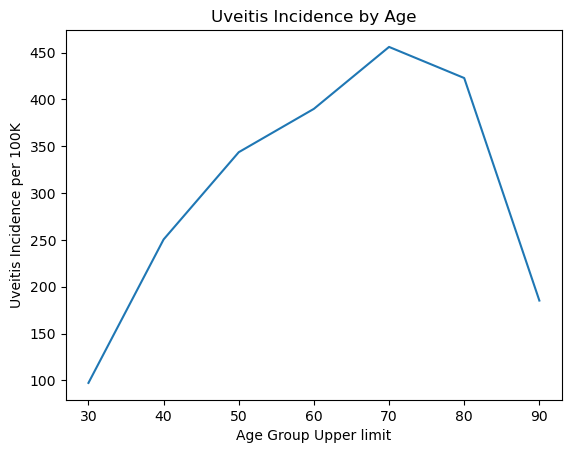

In [11]:
plt.plot(merging_uve_age['uve_incidence'])
plt.xlabel('Age Group Upper limit')
plt.ylabel('Uveitis Incidence per 100K')
plt.title('Uveitis Incidence by Age')
plt.savefig('THIN_Uveitis_incidince.svg')


In [12]:
def csv_name(disease):
    prefix = '_uve_age.csv'
    name = disease + prefix
    return name    

In [13]:
def process_age_data(disease, merging_uve_age=merging_uve_age):
    """
    Process age data from a CSV file.

    Args:
    file_name (str): Path to the CSV file containing age data.
    merging_uve_age (DataFrame): A DataFrame with 'controls_n' and 'uveitis_n' columns for additional calculations.

    Returns:
    DataFrame: The processed age data.
    """
    # Load data
    as_age = pd.read_csv(csv_name(disease))
    
    # Set 'Age' as index and remove the 'Total' row
    as_age.set_index('Age', inplace=True)
    as_age.drop(['Total'], inplace=True)
    
    # Combine rows for age '16' and '30', then set new index values
    as_age.loc['30'] = as_age.loc[['16', '30']].sum()
    as_age.drop(['16'], inplace=True)
    as_age.index = as_age.index.astype(int)
    as_age.index = as_age.index
    
    # Calculate new columns based on the 'merging_uve_age' DataFrame
    as_age[f'{disease}_uve_inc'] = as_age['Number'] / (merging_uve_age['controls_n'] / 100000)
    as_age[f'{disease}_prop_uve'] = as_age['Number'] / merging_uve_age['uveitis_n']
    
    return as_age



In [14]:
as_age = process_age_data('as')
ms_age = process_age_data('ms')
uc_age = process_age_data('uc')
crohns_age = process_age_data('crohns')
psoriasis_age = process_age_data('psoriasis')
ra_age = process_age_data('ra')
sarcoid_age = process_age_data('sarcoid')
sle_age = process_age_data('sle')


In [17]:
as_age

,Percentage,Number,Cumulative,as_uve_inc,as_prop_uve
Age,,,,,
30,9.70,79.00,10.06,1.540404,0.015828
40,25.52,208.00,35.21,11.516617,0.045967
50,27.36,223.00,62.58,16.957865,0.049336
60,21.60,176.00,84.17,16.999411,0.043586
70,11.78,96.00,95.95,12.685392,0.027810
80,27.00,3.31,99.26,0.636308,0.001505
90,6.00,0.74,100.00,0.232766,0.001256


Text(0, 0.5, 'MS-Uveitis Incidence per 100K')

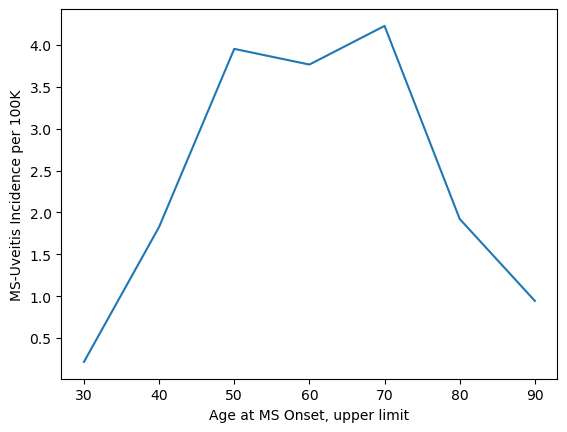

In [16]:
plt.plot(ms_age['ms_uve_inc'])
#plt.plot(ms_age['ms_prop_uve'])
plt.xlabel("Age at MS Onset, upper limit")
plt.ylabel("MS-Uveitis Incidence per 100K")

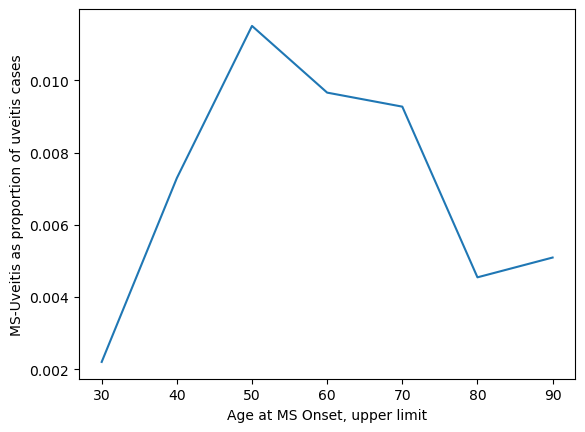

In [15]:
plt.plot(ms_age['ms_prop_uve'])
plt.xlabel("Age at MS Onset, upper limit")
plt.ylabel("MS-Uveitis as proportion of uveitis cases")
plt.savefig('THIN_MSuve_proportion.svg')

Text(0, 0.5, 'AS-Uveitis Incidence per 100K')

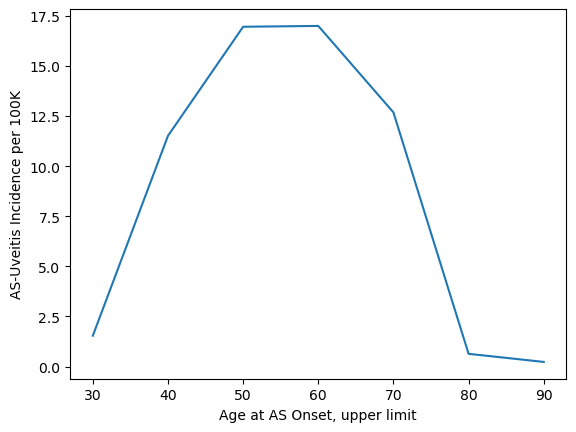

In [18]:
plt.plot(as_age['as_uve_inc'])
plt.xlabel("Age at AS Onset, upper limit")
plt.ylabel("AS-Uveitis Incidence per 100K")

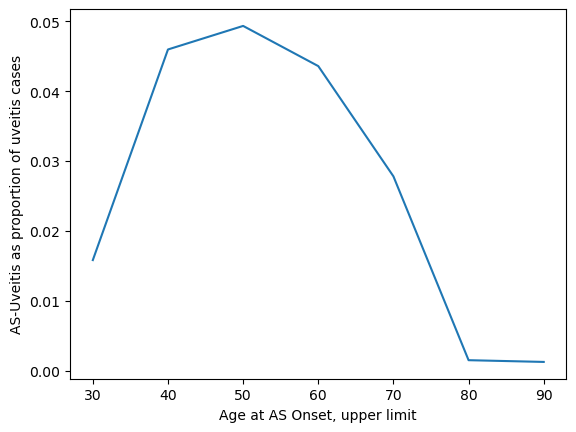

In [16]:
plt.plot(as_age['as_prop_uve'])
plt.xlabel("Age at AS Onset, upper limit")
plt.ylabel("AS-Uveitis as proportion of uveitis cases")
plt.savefig('THIN_ASuve_proportion.svg')

Text(0, 0.5, 'SLE-Uveitis Incidence per 100K')

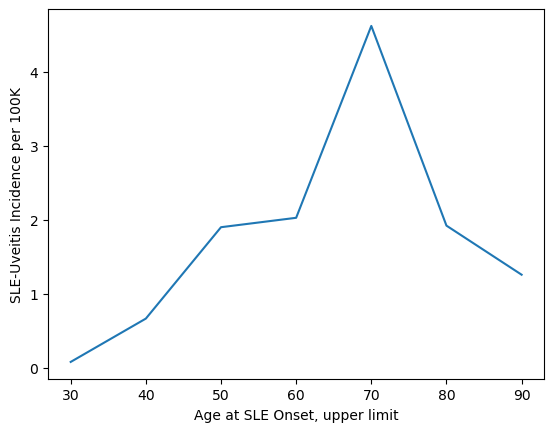

In [20]:
plt.plot(sle_age['sle_uve_inc'])
plt.xlabel("Age at SLE Onset, upper limit")
plt.ylabel("SLE-Uveitis Incidence per 100K")

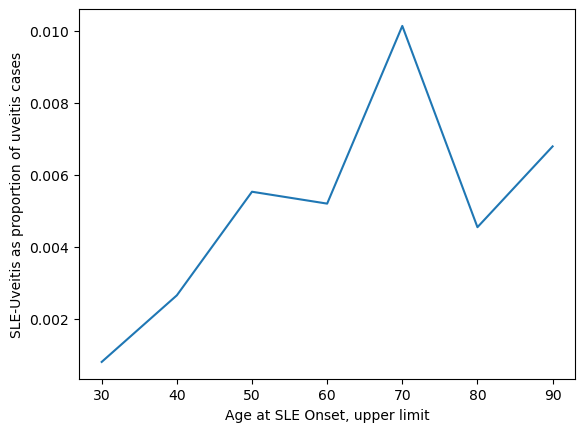

In [17]:
plt.plot(sle_age['sle_prop_uve'])
plt.xlabel("Age at SLE Onset, upper limit")
plt.ylabel("SLE-Uveitis as proportion of uveitis cases")
plt.savefig('THIN_SLEuve_proportion.svg')

Text(0, 0.5, 'UC-Uveitis Incidence per 100K')

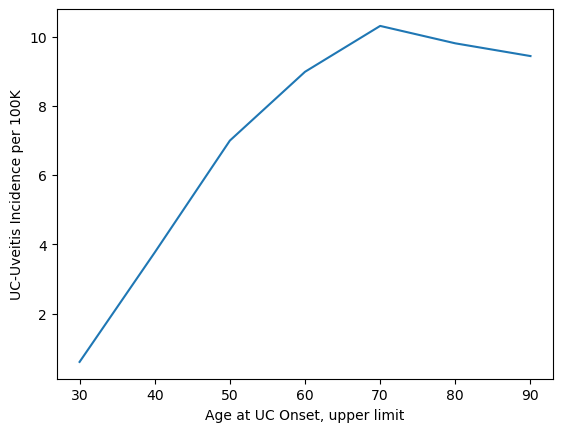

In [22]:
plt.plot(uc_age['uc_uve_inc'])
plt.xlabel("Age at UC Onset, upper limit")
plt.ylabel("UC-Uveitis Incidence per 100K")

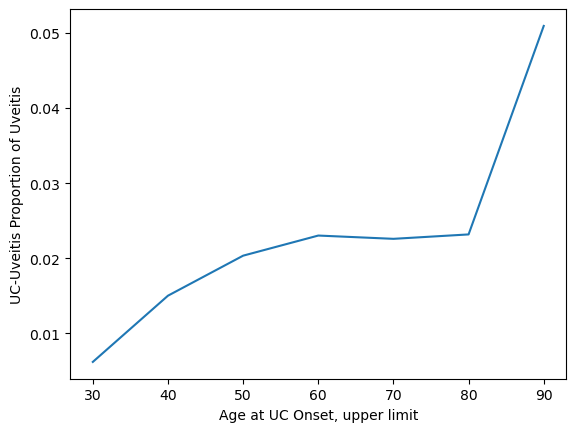

In [18]:
plt.plot(uc_age['uc_prop_uve'])
plt.xlabel("Age at UC Onset, upper limit")
plt.ylabel("UC-Uveitis Proportion of Uveitis")
plt.savefig('THIN_UCuve_proportion.svg')

Text(0, 0.5, 'Crohns-Uveitis Incidence per 100K')

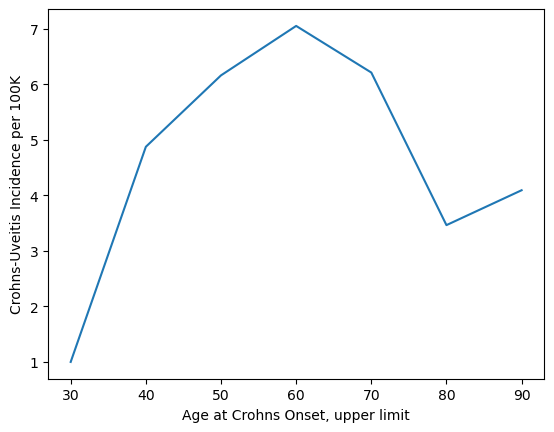

In [24]:
plt.plot(crohns_age['crohns_uve_inc'])
plt.xlabel("Age at Crohns Onset, upper limit")
plt.ylabel("Crohns-Uveitis Incidence per 100K")

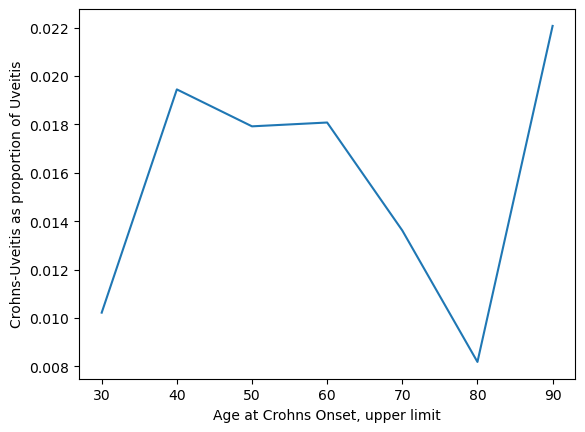

In [19]:
plt.plot(crohns_age['crohns_prop_uve'])
plt.xlabel("Age at Crohns Onset, upper limit")
plt.ylabel("Crohns-Uveitis as proportion of Uveitis")
plt.savefig('THIN_Crohnsuve_proportion.svg')

Text(0, 0.5, 'Psoriasis-Uveitis Incidence per 100K')

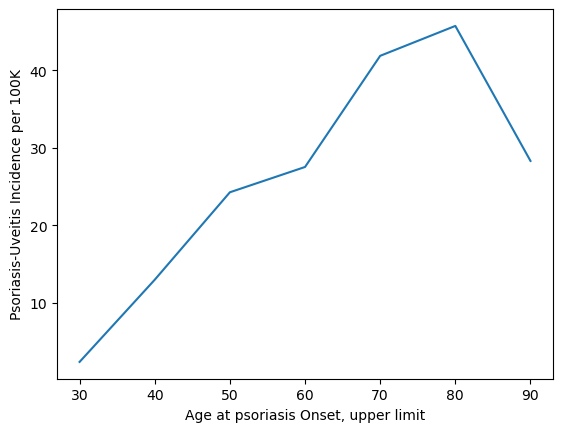

In [26]:
plt.plot(psoriasis_age['psoriasis_uve_inc'])
plt.xlabel("Age at psoriasis Onset, upper limit")
plt.ylabel("Psoriasis-Uveitis Incidence per 100K")

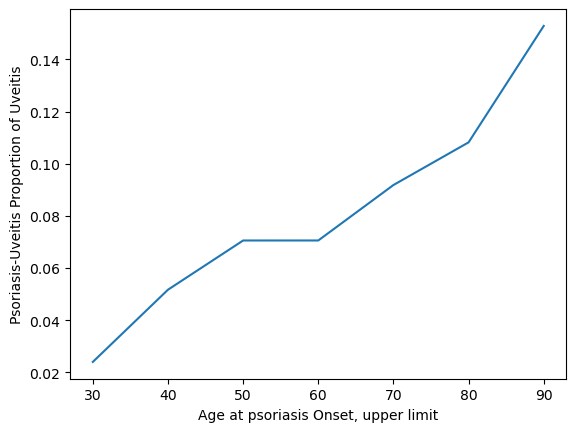

In [20]:
plt.plot(psoriasis_age['psoriasis_prop_uve'])
plt.xlabel("Age at psoriasis Onset, upper limit")
plt.ylabel("Psoriasis-Uveitis Proportion of Uveitis")
plt.savefig('THIN_Psoriasisuve_proportion.svg')

Text(0, 0.5, 'Sarcoidosis-Uveitis Incidence per 100K')

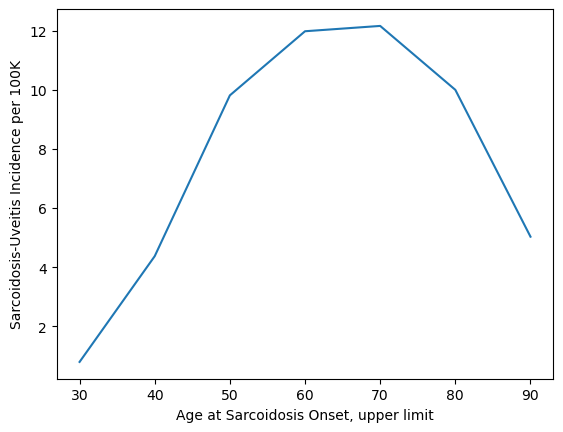

In [28]:
plt.plot(sarcoid_age['sarcoid_uve_inc'])
plt.xlabel("Age at Sarcoidosis Onset, upper limit")
plt.ylabel("Sarcoidosis-Uveitis Incidence per 100K")

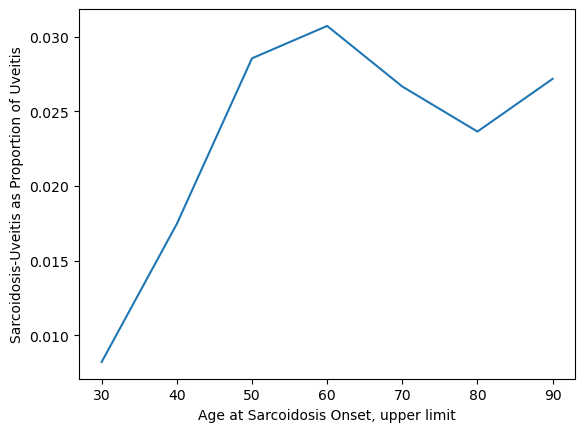

In [21]:
plt.plot(sarcoid_age['sarcoid_prop_uve'])
plt.xlabel("Age at Sarcoidosis Onset, upper limit")
plt.ylabel("Sarcoidosis-Uveitis as Proportion of Uveitis")
plt.savefig('THIN_SarcoidUve_proportion.svg')

Text(0, 0.5, 'RhA-Uveitis Incidence per 100K')

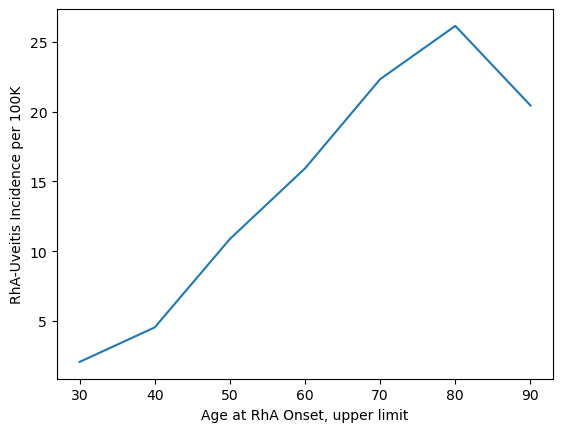

In [30]:
plt.plot(ra_age['ra_uve_inc'])
plt.xlabel("Age at RhA Onset, upper limit")
plt.ylabel("RhA-Uveitis Incidence per 100K")

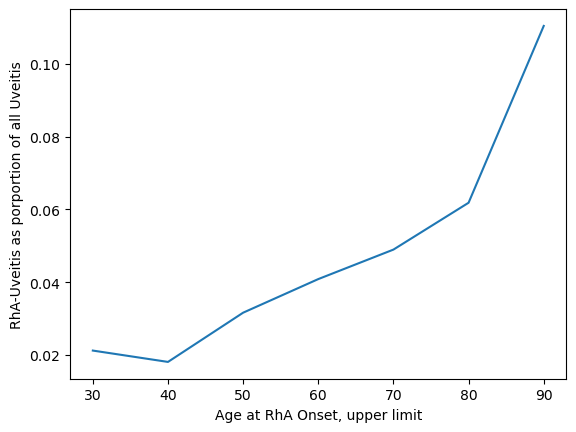

In [22]:
plt.plot(ra_age['ra_prop_uve'])
plt.xlabel("Age at RhA Onset, upper limit")
plt.ylabel("RhA-Uveitis as porportion of all Uveitis")
plt.savefig('THIN_RAuve_proportion.svg')